In [ ]:
try:
  %tensorflow_version 2.x
except:
  pass

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

from tqdm import tqdm
print(tf.__version__)
print(hub.__version__)


2.3.0
0.10.0


In [ ]:
 ! pip install -q kaggle
from google.colab import files 
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"kalpeshkhandelwal","key":"c244f17e98ffd4d1b2d3bebe804e4698"}'}

In [ ]:
 ! mkdir ~/.kaggle 

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                     title                                              size  lastUpdated          downloadCount  
------------------------------------------------------  -----------------------------------------------  ------  -------------------  -------------  
unanimad/us-election-2020                               US Election 2020                                  429KB  2020-11-19 10:31:50           6579  
antgoldbloom/covid19-data-from-john-hopkins-university  COVID-19 data from John Hopkins University          3MB  2020-11-20 06:04:06           2877  
manchunhui/us-election-2020-tweets                      US Election 2020 Tweets                           353MB  2020-11-09 18:51:59           2950  
headsortails/us-election-2020-presidential-debates      US Election 2020 - Presidential Debates           199MB  2020-10-23 16:56:10            525  
etsc9287/2020-general-election-polls                    Election, COVID, and Demographic Data by Cou

In [ ]:
!kaggle datasets download -d kalpeshkhandelwal/plantvillagek

 98% 809M/825M [00:17<00:00, 54.6MB/s]
100% 825M/825M [00:17<00:00, 49.7MB/s]


In [ ]:
!unzip plantvillagek.zip


Streaming output truncated to the last 5000 lines.
  inflating: PlantVillage/val/Soybean___healthy/76bd9efb-0c1a-4cd3-b511-6a5ad445b97d___RS_HL 3538.JPG  
  inflating: PlantVillage/val/Soybean___healthy/76cb8084-4de5-4192-8bdd-d17a4ee8c2ce___RS_HL 2882.JPG  
  inflating: PlantVillage/val/Soybean___healthy/76f769f6-acf9-43a9-a17c-eb493d498254___RS_HL 7444.JPG  
  inflating: PlantVillage/val/Soybean___healthy/7709cc6f-6462-4892-b63a-dc6d95ff8267___RS_HL 6776.JPG  
  inflating: PlantVillage/val/Soybean___healthy/7727dd52-e294-4d4f-af5a-d0a2b092bf64___RS_HL 5441.JPG  
  inflating: PlantVillage/val/Soybean___healthy/778eac45-19fd-4c26-96ff-ca5af8892777___RS_HL 4191.JPG  
  inflating: PlantVillage/val/Soybean___healthy/7832e76a-e419-4dbf-a422-416d0e251df5___RS_HL 7159.JPG  
  inflating: PlantVillage/val/Soybean___healthy/783ce998-9d07-465b-8aa5-00a748f303b6___RS_HL 7376.JPG  
  inflating: PlantVillage/val/Soybean___healthy/78508b39-9ad6-44a5-8f91-ccc03f375a72___RS_HL 6370.JPG  
  inflating: 

In [ ]:
module_selection = ("mobilenet_v2", 224, 1280) #@param ["(\"mobilenet_v2\", 224, 1280)", "(\"inception_v3\", 299, 2048)"] {type:"raw", allow-input: true}
handle_base, pixels, FV_SIZE = module_selection
MODULE_HANDLE ="https://tfhub.dev/google/tf2-preview/{}/feature_vector/4".format(handle_base)
IMAGE_SIZE = (pixels, pixels)
print("Using {} with input size {} and output dimension {}".format(
  MODULE_HANDLE, IMAGE_SIZE, FV_SIZE))

Using https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4 with input size (224, 224) and output dimension 1280


In [ ]:

import time
import os
from os.path import exists
PATH = '/content/PlantVillage'
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'val')

def count(dir, counter=0):
    "returns number of files in dir and subdirs"
    for pack in os.walk(dir):
        for f in pack[2]:
            counter += 1
    return dir + " : " + str(counter) + "files"


In [ ]:
print('total images for training :', count(train_dir))
print('total images for validation :', count(validation_dir))

total images for training : /content/PlantVillage/train : 44016files
total images for validation : /content/PlantVillage/val : 11004files


In [ ]:
!wget https://github.com/obeshor/Plant-Diseases-Detector/archive/master.zip
!unzip master.zip;

--2020-11-20 07:06:02--  https://github.com/obeshor/Plant-Diseases-Detector/archive/master.zip
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/obeshor/Plant-Diseases-Detector/zip/master [following]
--2020-11-20 07:06:02--  https://codeload.github.com/obeshor/Plant-Diseases-Detector/zip/master
Resolving codeload.github.com (codeload.github.com)... 140.82.113.9
Connecting to codeload.github.com (codeload.github.com)|140.82.113.9|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘master.zip’

master.zip              [  <=>               ]  12.49M  15.2MB/s    in 0.8s    

2020-11-20 07:06:03 (15.2 MB/s) - ‘master.zip’ saved [13094565]

Archive:  master.zip
33dc8985c943175a7a1301fe034c01d69bebb8cf
   creating: Plant-Diseases-Detector-master/
   creating: Plant-Diseases

In [ ]:
import json

with open('Plant-Diseases-Detector-master/categories.json', 'r') as f:
    cat_to_name = json.load(f)
    classes = list(cat_to_name.values())
    
print (classes)

['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Sp

In [ ]:
print('Number of classes:',len(classes))

Number of classes: 39


In [ ]:
IMAGE_SHAPE = (224, 224)

BATCH_SIZE = 64 #@param {type:"integer"}

In [ ]:
# Inputs are suitably resized for the selected module. Dataset augmentation (i.e., random distortions of an image each time it is read) improves training, esp. when fine-tuning.

validation_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_directory(
    validation_dir, 
    shuffle=False, 
    seed=42,
    color_mode="rgb", 
    class_mode="categorical",
    target_size=IMAGE_SHAPE,
    batch_size=BATCH_SIZE)

do_data_augmentation = True #@param {type:"boolean"}
if do_data_augmentation:
  train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
      rescale = 1./255,
      rotation_range=40,
      horizontal_flip=True,
      width_shift_range=0.2, 
      height_shift_range=0.2,
      shear_range=0.2, 
      zoom_range=0.2,
      fill_mode='nearest' )
else:
  train_datagen = validation_datagen
  
train_generator = train_datagen.flow_from_directory(
    train_dir, 
    subset="training", 
    shuffle=True, 
    seed=42,
    color_mode="rgb", 
    class_mode="categorical",
    target_size=IMAGE_SHAPE,
    batch_size=BATCH_SIZE)

Found 11004 images belonging to 39 classes.
Found 44016 images belonging to 39 classes.


In [ ]:
model = tf.keras.Sequential([
  hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4", 
                 output_shape=[1280],
                 trainable=False),
  tf.keras.layers.Dropout(0.4),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dropout(rate=0.2),
  tf.keras.layers.Dense(train_generator.num_classes, activation='softmax')
])

In [ ]:
#Compile model specifying the optimizer learning rate

LEARNING_RATE = 0.001 #@param {type:"number"}

model.compile(
   optimizer=tf.keras.optimizers.Adam(lr=LEARNING_RATE), 
   loss='categorical_crossentropy',
   metrics=['accuracy'])

In [ ]:
EPOCHS=10 #@param {type:"integer"}

history = model.fit_generator(
        train_generator,
        steps_per_epoch=train_generator.samples//train_generator.batch_size,
        epochs=EPOCHS,
        validation_data=validation_generator,
        validation_steps=validation_generator.samples//validation_generator.batch_size)

Instructions for updating:
Please use Model.fit, which supports generators.


Instructions for updating:
Please use Model.fit, which supports generators.


Epoch 1/10
687/687 [==============================] - 499s 727ms/step - loss: 0.7319 - accuracy: 0.7788 - val_loss: 0.2850 - val_accuracy: 0.9108
Epoch 2/10
687/687 [==============================] - 500s 728ms/step - loss: 0.4357 - accuracy: 0.8582 - val_loss: 0.2677 - val_accuracy: 0.9129
Epoch 3/10
687/687 [==============================] - 521s 759ms/step - loss: 0.3855 - accuracy: 0.8730 - val_loss: 0.2245 - val_accuracy: 0.9234
Epoch 4/10
687/687 [==============================] - 534s 777ms/step - loss: 0.3588 - accuracy: 0.8825 - val_loss: 0.2443 - val_accuracy: 0.9191
Epoch 5/10
687/687 [==============================] - 501s 730ms/step - loss: 0.3458 - accuracy: 0.8855 - val_loss: 0.2113 - val_accuracy: 0.9295
Epoch 6/10
687/687 [==============================] - 497s 724ms/step - loss: 0.3382 - accuracy: 0.8878 - val_loss: 0.1867 - val_accuracy: 0.9388
Epoch 7/10
687/687 [==============================] - 498s 725ms/step - loss: 0.3241 - accuracy: 0.8920 - val_loss: 0.2039 -

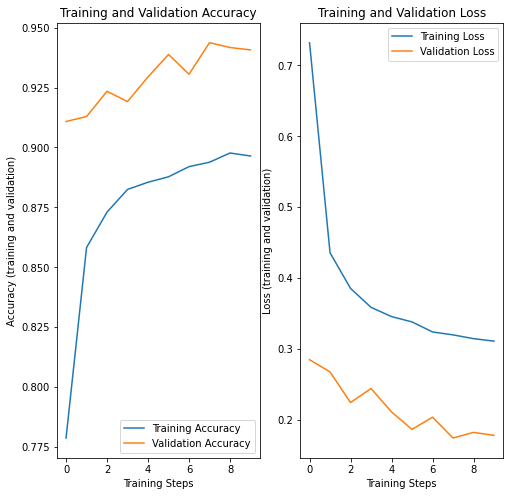

In [ ]:
import matplotlib.pylab as plt
import numpy as np

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.ylabel("Accuracy (training and validation)")
plt.xlabel("Training Steps")

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.ylabel("Loss (training and validation)")
plt.xlabel("Training Steps")
plt.show()

In [ ]:
# Import OpenCV
import cv2

# Utility
import itertools
import random
from collections import Counter
from glob import iglob


def load_image(filename):
    img = cv2.imread(os.path.join(train_dir, validation_dir, filename))
    img = cv2.resize(img, (IMAGE_SHAPE[0], IMAGE_SHAPE[1]) )
    img = img /255
    
    return img


def predict(image):
    probabilities = model.predict(np.asarray([img]))[0]
    class_idx = np.argmax(probabilities)
    
    return {classes[class_idx]: probabilities[class_idx]}

SOURCE: class: Tomato___Late_blight, file: Tomato___Late_blight/745086e9-2e07-48e3-809e-7448e14332ef___GHLB2 Leaf 134.2.JPG
PREDICTED: class: Tomato___Late_blight, confidence: 0.846453


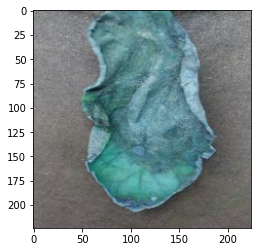

<Figure size 432x288 with 0 Axes>

SOURCE: class: Apple___healthy, file: Apple___healthy/f37b30bb-fc44-488b-9184-bd6f73187803___RS_HL 7955.JPG
PREDICTED: class: Apple___healthy, confidence: 0.999626


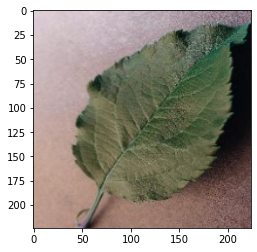

SOURCE: class: Corn_(maize)___Northern_Leaf_Blight, file: Corn_(maize)___Northern_Leaf_Blight/b88f09d6-6951-48bc-ac61-ca9cc9e988fa___RS_NLB 0828.JPG
PREDICTED: class: Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot, confidence: 0.498706


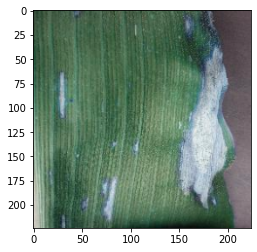

<Figure size 432x288 with 0 Axes>

SOURCE: class: Tomato___Tomato_Yellow_Leaf_Curl_Virus, file: Tomato___Tomato_Yellow_Leaf_Curl_Virus/ef6916e0-494b-4594-81e8-b7b884560aa2___UF.GRC_YLCV_Lab 02857.JPG
PREDICTED: class: Tomato___Tomato_Yellow_Leaf_Curl_Virus, confidence: 0.999993


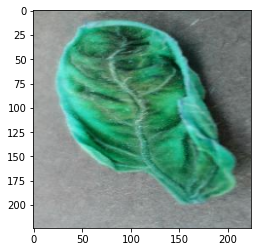

<Figure size 432x288 with 0 Axes>

SOURCE: class: Peach___Bacterial_spot, file: Peach___Bacterial_spot/87975d13-787e-4c74-8b0b-c3762f799da6___Rut._Bact.S 1123.JPG
PREDICTED: class: Peach___Bacterial_spot, confidence: 0.898961


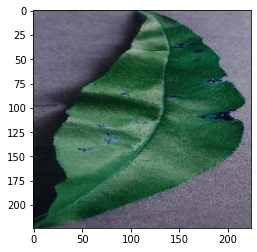

<Figure size 432x288 with 0 Axes>

In [ ]:
for idx, filename in enumerate(random.sample(validation_generator.filenames, 5)):
    print("SOURCE: class: %s, file: %s" % (os.path.split(filename)[0], filename))
    
    img = load_image(filename)
    prediction = predict(img)
    print("PREDICTED: class: %s, confidence: %f" % (list(prediction.keys())[0], list(prediction.values())[0]))
    plt.imshow(img)
    plt.figure(idx)    
    plt.show()

In [ ]:
plant_model = "exp_saved_model"
tf.saved_model.save(model,plant_model)
converter = tf.lite.TFLiteConverter.from_saved_model(plant_model)
tflite_model = converter.convert()
tflite_model_file = 'converted_model.tflite'

with open(tflite_model_file,"wb")as f:
  f.write(tflite_model)

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


INFO:tensorflow:Assets written to: exp_saved_model/assets


INFO:tensorflow:Assets written to: exp_saved_model/assets


In [ ]:
interpreter = tf.lite.Interpreter(model_path = tflite_model_file)
interpreter.allocate_tensors()

input_index = interpreter.getinput_details()[0]["index"]
output_index = interpreter.get_output_details()[0]["index"]